In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk
import pandas.util.testing as tm
import math
import pickle
import joblib

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

C:\Users\ayonm\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Cleaning and Preprocessing

In [2]:
#Reading text and storing it in a list
train=[]
val=[]
test=[]
with open('train.txt') as tr:
    tr_line = tr.readlines()
    #print(lines)
    train.append(tr_line)

with open('val.txt') as v:
    val_line = v.readlines()
    val.append(val_line)
    
with open('test.txt') as te:
    te_line = te.readlines()
    test.append(te_line)

In [3]:
#Selecting every line(input data) from the list including the class label
def create(file):
    data= file[0]
    new=[]

    for d in data:
        g=d.split(';')
        #print(g)
        new.append(g)
    return new

train_mod= create(train)
cv_mod= create(val)
test_mod= create(test)

In [4]:
print(train_mod[0])

['i didnt feel humiliated', 'sadness\n']


In [5]:
#storing every data-point to a dataframe
df_train= pd.DataFrame(train_mod,columns=['text','mood'])
df_val= pd.DataFrame(cv_mod,columns=['text','mood'])
df_test= pd.DataFrame(test_mod,columns=['text','mood'])

In [6]:
df_train.head()

,text,mood
0,i didnt feel humiliated,sadness\n
1,i can go from feeling so hopeless to so damned...,sadness\n
2,im grabbing a minute to post i feel greedy wrong,anger\n
3,i am ever feeling nostalgic about the fireplac...,love\n
4,i am feeling grouchy,anger\n


In [7]:
df_train['mood'].value_counts()

joy\n         5362
sadness\n     4666
anger\n       2159
fear\n        1937
love\n        1304
surprise\n     572
Name: mood, dtype: int64

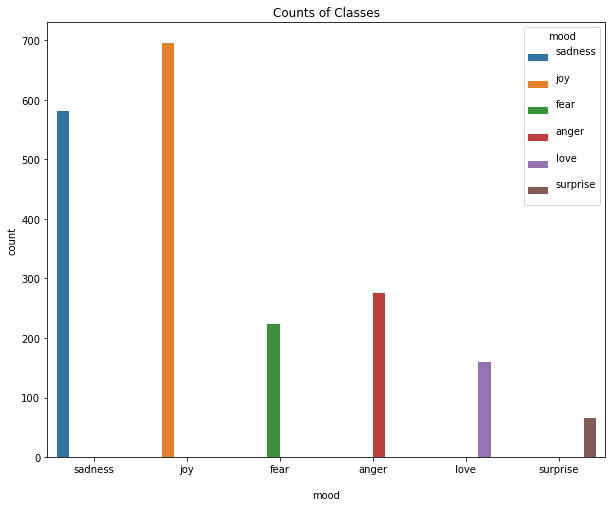

In [8]:
#Visualizing the count of class label(mood) in the train dataset
plt.figure(figsize=(10,8))
sns.countplot(x ='mood',hue='mood', data = df_test)
plt.title('Counts of Classes')
plt.show()

In [9]:
sta= df_train['text']
print(sta[0])

i didnt feel humiliated


In [10]:
#Adding columns in dataframe for ID,select_text and sentiment for train,validation and test dataset
df_train['ID']=np.nan
df_train['sentiment']=np.nan
df_train['select_text']=np.nan
df_train=df_train[['ID','text','select_text','sentiment','mood']]
#df_train.head()

df_val['ID']=np.nan
df_val['sentiment']=np.nan
df_val['select_text']=np.nan
df_val=df_val[['ID','text','select_text','sentiment','mood']]

df_test['ID']=np.nan
df_test['sentiment']=np.nan
df_test['select_text']=np.nan
df_test=df_test[['ID','text','select_text','sentiment','mood']]

In [11]:
#Adding unique ID to all datapoints
tr_uid=[]
for i in range(len(df_train['text'])):
    tr_uid.append(i+1)
#print(uid)

cv_uid=[]
for i in range(len(df_val['text'])):
    cv_uid.append(i+1)
    
te_uid=[]
for i in range(len(df_test['text'])):
    te_uid.append(i+1)

In [12]:
df_train['ID']=tr_uid
df_val['ID']= cv_uid
df_test['ID']= te_uid
df_train.head()

,ID,text,select_text,sentiment,mood
0,1,i didnt feel humiliated,NaN,NaN,sadness\n
1,2,i can go from feeling so hopeless to so damned...,NaN,NaN,sadness\n
2,3,im grabbing a minute to post i feel greedy wrong,NaN,NaN,anger\n
3,4,i am ever feeling nostalgic about the fireplac...,NaN,NaN,love\n
4,5,i am feeling grouchy,NaN,NaN,anger\n


### Stop-Words and Lemmatizer are used for select_text feature as pre-processed data.

In [13]:
sw = set(stopwords.words('english'))
print(sw)

{'be', 'how', 'shouldn', 'an', 'further', "wouldn't", 'isn', 'who', 'off', 'just', 'until', 'such', 'those', 'up', 'most', "didn't", "won't", 'other', 'shan', 'no', 'ain', 's', 'ours', "haven't", 'there', "it's", "needn't", 'when', 'why', 'o', 'himself', 'you', 'wouldn', 'its', 'by', 'it', 'doesn', 'wasn', "weren't", 'what', 'our', 'on', 'she', "hadn't", 'below', 'than', 'with', 've', 'again', 'because', 'that', 'll', 'theirs', 'her', "should've", 'herself', 'too', 'i', 'these', 'but', 'to', 'here', 'myself', 'themselves', 'for', 'the', "mightn't", 'in', 'haven', 'after', 'from', 'can', 'ourselves', 'doing', 'during', 'not', 'ma', 'of', 'some', "shan't", 'him', 'we', "isn't", 'all', 'didn', 'yourselves', 'same', 'am', 'whom', 'above', "that'll", 'been', 'itself', 'into', 'are', 'should', "shouldn't", 'before', 'if', 'then', 'did', 'between', 'being', 'does', 'd', 'only', 'mustn', "you'd", 'out', 'own', 'will', 'weren', 'them', 'having', 'over', 'so', 'don', "couldn't", 'hadn', 'is', "w

In [14]:
#Removing stop-words and after that lemmatizing the word
lm= WordNetLemmatizer()
def word_process(sent):
    corpus=[]
    for s in sent:
        word=[]
        p=nltk.word_tokenize(s)
        for w in p:
            v=lm.lemmatize(w)
            if v not in sw and len(v)>2:
                #print(v)
                word.append(v)
        corpus.append(word)
    return corpus

In [15]:
#storing pre-processed text to dataframe
tr_corpus= df_train['text']
val_corpus= df_val['text']
te_corpus= df_test['text']
train_pro= word_process(tr_corpus)
val_pro= word_process(val_corpus)
test_pro= word_process(te_corpus)

In [16]:
print(train_pro[0:5])
print(len(train_pro))
print(val_pro[0:5])
print(len(val_pro))
print(test_pro[0:5])
print(len(test_pro))

[['didnt', 'feel', 'humiliated'], ['feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'care', 'awake'], ['grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong'], ['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'], ['feeling', 'grouchy']]
16000
[['feeling', 'quite', 'sad', 'sorry', 'ill', 'snap', 'soon'], ['feel', 'like', 'still', 'looking', 'blank', 'canvas', 'blank', 'piece', 'paper'], ['feel', 'like', 'faithful', 'servant'], ['feeling', 'cranky', 'blue'], ['treat', 'feeling', 'festive']]
2000
[['feeling', 'rather', 'rotten', 'ambitious', 'right'], ['updating', 'blog', 'feel', 'shitty'], ['never', 'make', 'separate', 'ever', 'want', 'feel', 'like', 'ashamed'], ['left', 'bouquet', 'red', 'yellow', 'tulip', 'arm', 'feeling', 'slightly', 'optimistic', 'arrived'], ['feeling', 'little', 'vain', 'one']]
2000


In [17]:
#Removing commas from text for each datapoint
def pre_process(data):
    text_list=[]
    for i in data:
        ll=','.join(map(str,i))
        h=ll.replace(',',' ')
        text_list.append(h)
    return text_list

In [18]:
pre_train= pre_process(train_pro)
pre_val= pre_process(val_pro)
pre_test= pre_process(test_pro)

In [19]:
df_train['select_text']=pre_train
df_val['select_text']=pre_val
df_test['select_text']=pre_test

### In Sentiment column we are going to add the actual class label with respect to mood value that will be used for Machine Learning Model.
### joy, love, surprise- Positive
### sadness, fear, anger- Negative

In [20]:
mood= df_train['mood']
for i,m in enumerate(mood):
    if m == 'love\n' or m=='joy\n' or m=='surprise\n':
        df_train['sentiment'][i]= 'positive'
    else:
        df_train['sentiment'][i]= 'negative'

C:\Users\ayonm\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ayonm\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\ayonm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
mood= df_val['mood']
for i,m in enumerate(mood):
    if m == 'love\n' or m=='joy\n' or m=='surprise\n':
        df_val['sentiment'][i]= 'positive'
    else:
        df_val['sentiment'][i]= 'negative'

C:\Users\ayonm\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ayonm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
mood= df_test['mood']
for i,m in enumerate(mood):
    if m == 'love\n' or m=='joy\n' or m=='surprise\n':
        df_test['sentiment'][i]= 'positive'
    else:
        df_test['sentiment'][i]= 'negative'

C:\Users\ayonm\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ayonm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
df_train.to_csv('train.csv')
df_train.head()

,ID,text,select_text,sentiment,mood
0,1,i didnt feel humiliated,didnt feel humiliated,negative,sadness\n
1,2,i can go from feeling so hopeless to so damned...,feeling hopeless damned hopeful around someone...,negative,sadness\n
2,3,im grabbing a minute to post i feel greedy wrong,grabbing minute post feel greedy wrong,negative,anger\n
3,4,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,positive,love\n
4,5,i am feeling grouchy,feeling grouchy,negative,anger\n


In [24]:
df_val.to_csv('val.csv')
df_val.head()

,ID,text,select_text,sentiment,mood
0,1,im feeling quite sad and sorry for myself but ...,feeling quite sad sorry ill snap soon,negative,sadness\n
1,2,i feel like i am still looking at a blank canv...,feel like still looking blank canvas blank pie...,negative,sadness\n
2,3,i feel like a faithful servant,feel like faithful servant,positive,love\n
3,4,i am just feeling cranky and blue,feeling cranky blue,negative,anger\n
4,5,i can have for a treat or if i am feeling festive,treat feeling festive,positive,joy\n


In [25]:
df_test.to_csv('test.csv')
df_test.head()

,ID,text,select_text,sentiment,mood
0,1,im feeling rather rotten so im not very ambiti...,feeling rather rotten ambitious right,negative,sadness\n
1,2,im updating my blog because i feel shitty,updating blog feel shitty,negative,sadness\n
2,3,i never make her separate from me because i do...,never make separate ever want feel like ashamed,negative,sadness\n
3,4,i left with my bouquet of red and yellow tulip...,left bouquet red yellow tulip arm feeling slig...,positive,joy\n
4,5,i was feeling a little vain when i did this one,feeling little vain one,negative,sadness\n


In [26]:
train= pd.read_csv('train.csv')
val= pd.read_csv('val.csv')
test= pd.read_csv('test.csv')

In [27]:
X_train= train['select_text']
y_train= train['sentiment']
X_cv= val['select_text']
y_cv= val['sentiment']
X_test= test['select_text']
y_test= test['sentiment']

### Tf-IDF for text processing

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
# Applying Tf-IDF in datapoints
tf_idf= TfidfVectorizer()
tf_idf.fit(X_train.values)
X_train_tf= tf_idf.transform(X_train.values)
X_val_tf= tf_idf.transform(X_cv.values)
X_test_tf= tf_idf.transform(X_test.values)

#Applying Encoder(label-encoder) in class label(output)
lc = preprocessing.LabelEncoder()
y_train_enc= lc.fit_transform(y_train)
y_cv_enc= lc.fit_transform(y_cv)
y_test_enc= lc.fit_transform(y_test)

### Model- Naive Baye's 

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
# Finding the best Hyper-parameter
parameter = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
nb = MultinomialNB(class_prior=[0.5,0.5])
clf = GridSearchCV(nb, parameter, cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tf,y_train_enc)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5],
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [30]:
print(clf.best_estimator_)
best_par=clf.best_params_
print('Best Hyper-parameter:',clf.best_params_)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)
Best Hyper-parameter: {'alpha': 1}


In [31]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000

    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])

    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [32]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

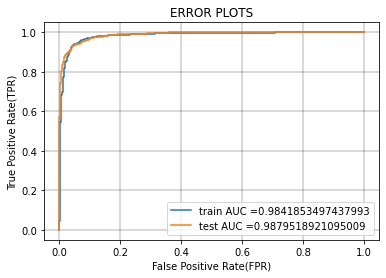

In [33]:
from sklearn.metrics import roc_curve, auc
#Training model with best hyper-parameter
tuned_parameters = [{'alpha': [1]}]
model_best = GridSearchCV(nb, tuned_parameters, scoring = 'roc_auc', cv=3)
model_best.fit(X_train_tf, y_train_enc)
#Saving model to csv file
filename = 'submission.csv'
joblib.dump(model_best, open(filename, mode='wb'))

y_train_pred = batch_predict(model_best, X_val_tf)    
y_test_pred = batch_predict(model_best, X_test_tf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_cv_enc, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_enc, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ERROR PLOTS")
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.show()

In [34]:
# Test AUC score
test_auc= auc(test_fpr, test_tpr)
print(test_auc)

0.9879518921095009


In [35]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_tf, y_test_enc)
print(result)

0.9879518921095009


### Confusion matrix for Naive Bayes

the maximum value of tpr*(1-fpr) 0.8930305588350451 for threshold 0.482
Train confusion matrix
[[992  45]
 [ 64 899]]
Test confusion matrix
[[1024   56]
 [  58  862]]


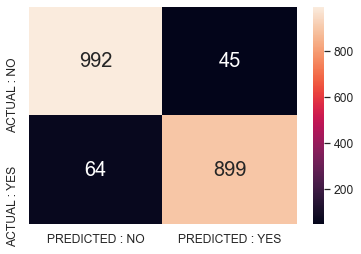

In [36]:
from sklearn.metrics import confusion_matrix
best_th = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_cv_enc, predict_with_best_t(y_train_pred, best_th)))
print("Test confusion matrix")
print(confusion_matrix(y_test_enc, predict_with_best_t(y_test_pred, best_th)))
conf_train=(confusion_matrix(y_cv_enc, predict_with_best_t(y_train_pred, best_th)))
conf_test=(confusion_matrix(y_test_enc, predict_with_best_t(y_test_pred, best_th)))

sns.set(font_scale=1.1)#for label size
sns.heatmap(conf_train, annot=True,annot_kws={"size": 20}, fmt='',xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'])

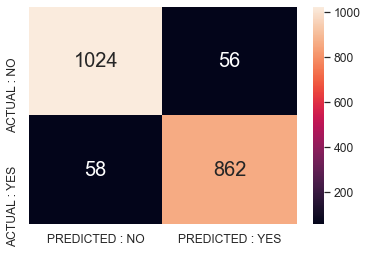

In [37]:
sns.set(font_scale=1.1)#for label size
sns.heatmap(conf_test, annot=True,annot_kws={"size": 20}, fmt='',xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'])

### Naive Baye's Performance metrics:
#### Test AUC= 0.988
#### Precision =TP/(TP+FP) = 862/(862+56)= 0.939
#### Recall= TP/(TP+FN)= 862/(862+58)=  0.937

In [38]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=3,scoring='roc_auc',random_state=25)

rf.fit(X_train_tf,y_train_enc)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=-1, 

In [39]:
print(rf.best_estimator_)
best_par_rf=rf.best_params_
print('Best Hyper-parameter:',rf.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)
Best Hyper-parameter: {'max_depth': 14, 'min_samples_leaf': 28, 'min_samples_split': 111, 'n_estimators': 121}


In [40]:
rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)



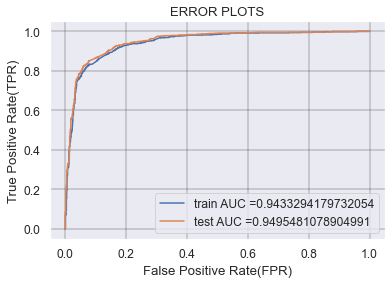

In [41]:
rf_clf.fit(X_train_tf,y_train_enc)

y_train_predrf = batch_predict(rf_clf, X_val_tf)    
y_test_predrf = batch_predict(rf_clf, X_test_tf)

train_fprrf, train_tprrf, tr_thresholdsrf = roc_curve(y_cv_enc, y_train_predrf)
test_fprrf, test_tprrf, te_thresholdsrf = roc_curve(y_test_enc, y_test_predrf)

plt.plot(train_fprrf, train_tprrf, label="train AUC ="+str(auc(train_fprrf, train_tprrf)))
plt.plot(test_fprrf, test_tprrf, label="test AUC ="+str(auc(test_fprrf, test_tprrf)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ERROR PLOTS")
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.show()

In [42]:
test_aucrf= auc(test_fprrf, test_tprrf)
print(test_aucrf)

0.9495481078904991


the maximum value of tpr*(1-fpr) 0.7663311072858743 for threshold 0.449
Train confusion matrix
[[959  78]
 [165 798]]
Test confusion matrix
[[998  82]
 [145 775]]


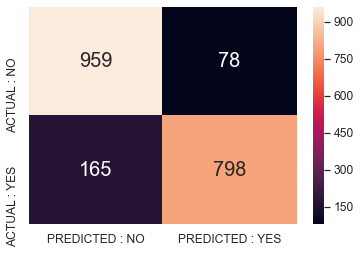

In [43]:
from sklearn.metrics import confusion_matrix
best_rf = find_best_threshold(tr_thresholdsrf, train_fprrf, train_tprrf)
print("Train confusion matrix")
print(confusion_matrix(y_cv_enc, predict_with_best_t(y_train_predrf, best_rf)))
print("Test confusion matrix")
print(confusion_matrix(y_test_enc, predict_with_best_t(y_test_predrf, best_rf)))
conf_trainrf=(confusion_matrix(y_cv_enc, predict_with_best_t(y_train_predrf, best_rf)))
conf_testrf=(confusion_matrix(y_test_enc, predict_with_best_t(y_test_predrf, best_rf)))

sns.set(font_scale=1.1)#for label size
sns.heatmap(conf_trainrf, annot=True,annot_kws={"size": 20}, fmt='',xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'])

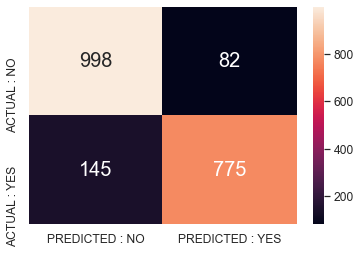

In [44]:
sns.set(font_scale=1.1)#for label size
sns.heatmap(conf_testrf, annot=True,annot_kws={"size": 20}, fmt='',xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'])

### Random Forest Perfomance metrics
#### Test AUC score- 0.949
#### Precision- TP/(TP+FP)= 818/(818+144)= 0.85
#### Recall- TP/(TP+FN)= 818/(818+102)= 0.889

In [45]:
from prettytable import PrettyTable
p= PrettyTable()
p.field_names=['Model','Hyper-parameter','AUC']
p.add_row(['Multinomial NB',best_par,test_auc])
p.add_row(['Random Forest',best_par_rf,test_aucrf])
print(p)

+----------------+------------------------------------------------------------------------------------------+--------------------+
|     Model      |                                     Hyper-parameter                                      |        AUC         |
+----------------+------------------------------------------------------------------------------------------+--------------------+
| Multinomial NB |                                       {'alpha': 1}                                       | 0.9879518921095009 |
| Random Forest  | {'max_depth': 14, 'min_samples_leaf': 28, 'min_samples_split': 111, 'n_estimators': 121} | 0.9495481078904991 |
+----------------+------------------------------------------------------------------------------------------+--------------------+
